# Statistical Analysis

### Possible Research Qs
- Does sleep affect mental health?
- Does diet affect mental health?
- Does financial stress affect mental health?
- Do depressed students perform worse/better academically? (gpa)

In [1]:
# install.packages("dplyr")
library(dplyr)
# install.packages("ggplot2")
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [27]:
df = read.csv('data/clean_dataset.csv')
df = df[,-1]
head(df)

,id,gender,age,academic_pressure,work_pressure,gpa,study_sat,sleep_dur,diet,suicidal_thoughts,study_hrs,financial_stress,family_hist,depression,age_lab,sleep_lab
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>,<chr>,<chr>
1,2,Male,33,5,0,8.97,2,5-6 hours,Healthy,Yes,3,1,No,1,31+,>5
2,8,Female,24,2,0,5.90,5,5-6 hours,Moderate,No,3,2,Yes,0,23-26,>5
3,26,Male,31,3,0,7.03,5,Less than 5 hours,Healthy,No,9,1,Yes,0,31+,<5
4,30,Female,28,3,0,5.59,2,7-8 hours,Moderate,Yes,4,5,Yes,1,27-30,>5
5,32,Female,25,4,0,8.13,3,5-6 hours,Moderate,Yes,1,1,No,0,23-26,>5
6,33,Male,29,2,0,5.70,3,Less than 5 hours,Healthy,No,4,1,No,0,27-30,<5


## Does Lack of Sleep Affect Depression?

Investigate whether getting less than 5 hours of sleep is associated with a higher rate of depression ($\bar{x}_1$) than that of students who sleep more than 5 hours per night ($\bar{x}_2$). Use significance level $\alpha = 0.01$.

$H_0$: $p_1 - p_2 = 0$ <br>
$H_A$: $p_1 - p_2 > 0$ ($p_1 > p_2$)

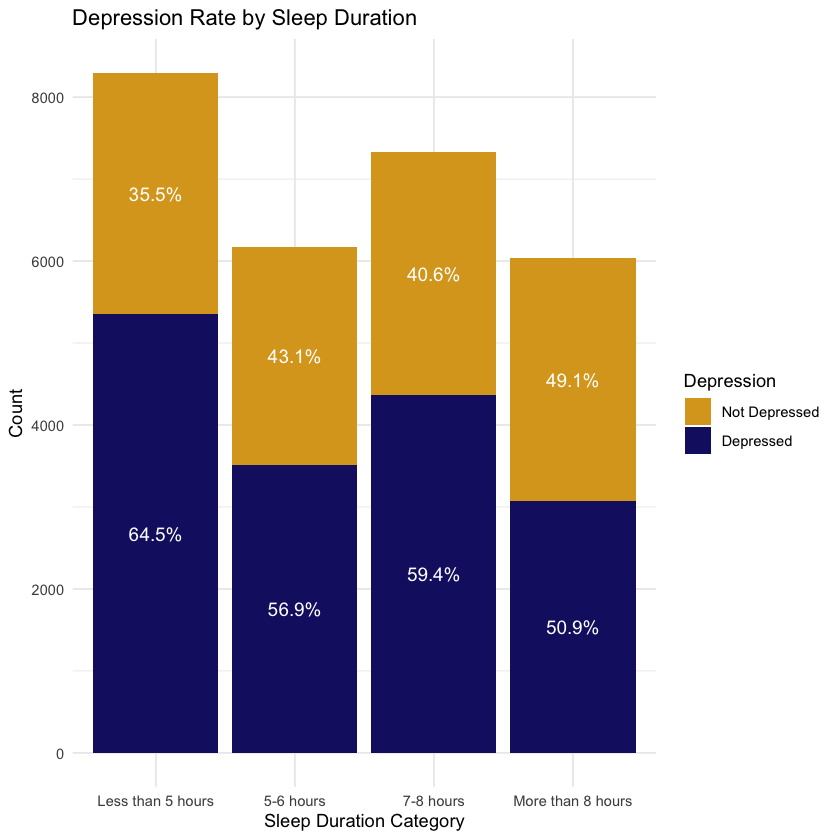

In [36]:
sleep_summary <- df %>%
  group_by(sleep_dur, depression) %>%
  summarise(count = n(), .groups = "drop") %>%
  group_by(sleep_dur) %>%
  mutate(percentage = count / sum(count) * 100)
sleep_summary$sleep_dur <- factor(sleep_summary$sleep_dur,
                                  levels = c('Less than 5 hours', '5-6 hours', '7-8 hours', 'More than 8 hours'))

# Then plot
my_plot = ggplot(sleep_summary,
       aes(x = sleep_dur, y = count, fill = factor(depression))) +
  geom_bar(stat = "identity", position = "stack") +
  geom_text(aes(label = paste0(round(percentage, 1), "%")),
            position = position_stack(vjust = 0.5), color = "white", size = 4) +
  scale_fill_manual(values = c("#DAA520", "#191970"),
                    name = "Depression",
                    labels = c("Not Depressed", "Depressed")) +
  labs(title = "Depression Rate by Sleep Duration",
       x = "Sleep Duration Category",
       y = "Count") +
  theme_minimal()
my_plot
# Save as PNG
ggsave("figures/sleep_dur_depression.png", plot = my_plot, width = 7, height = 5, units = "in", dpi = 300)

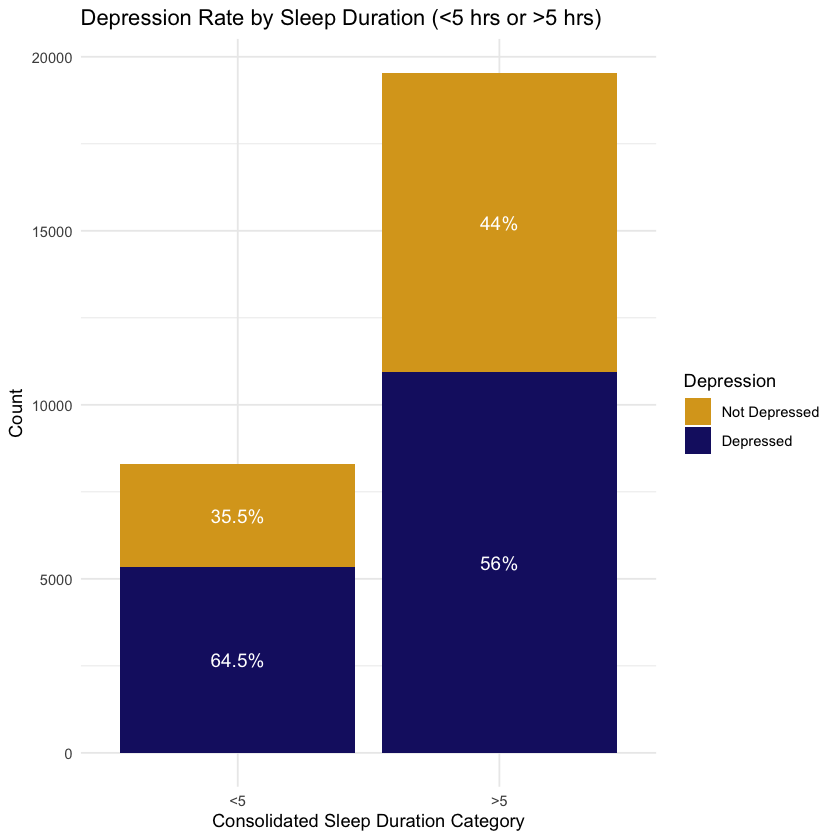

In [37]:
sleep5 <- df %>%
  group_by(sleep_lab, depression) %>%
  summarise(count = n(), .groups = "drop") %>%
  group_by(sleep_lab) %>%
  mutate(percentage = count / sum(count) * 100)
sleep5$sleep_lab <- factor(sleep5$sleep_lab,
                                  levels = c("<5", ">5"))

# Then plot
my_plot2 = ggplot(sleep5,
       aes(x = sleep_lab, y = count, fill = factor(depression))) +
  geom_bar(stat = "identity", position = "stack") +
  geom_text(aes(label = paste0(round(percentage, 1), "%")),
            position = position_stack(vjust = 0.5), color = "white", size = 4) +
  scale_fill_manual(values = c("#DAA520", "#191970"),
                    name = "Depression",
                    labels = c("Not Depressed", "Depressed")) +
  labs(title = "Depression Rate by Sleep Duration (<5 hrs or >5 hrs)",
       x = "Consolidated Sleep Duration Category",
       y = "Count") +
  theme_minimal()

my_plot2

ggsave("figures/sleep_5_depression.png", plot = my_plot2, width = 7, height = 5, units = "in", dpi = 300)

In [6]:
# Group dataframe
sleep <- df %>%
    group_by(sleep_lab) %>%
    summarise(
        sum = sum(depression),
        count = n(),
        proportion = sum/count)
sleep

sleep_lab,sum,count,proportion
<chr>,<int>,<int>,<dbl>
<5,5352,8297,0.6450524
>5,10938,19540,0.5597748


From the summary above, we see that $P(\text{Depression} | <5 \text{hrs of Sleep}) \approx 0.6451$, and $P(\text{Depression} | >5 \text{hrs of Sleep}) \approx 0.5598$. 

Thus $p_{<5} = 0.6451$ and $p_{>5} = 0.5598$ and the difference in sample proportions $p_{<5} - p_{>5} = 0.6451 - 0.5598 = 0.0853$

In our sample, students who sleep less than 5 hours per night have an approx. 8.53% higher rate of depression than students who sleep more than 5 hours per night.

Next, we test our null hypothesis using a **2-proportion z-test**. First we calculate manually, then use `prop.test()`.

In [44]:
# Sample sizes
n1 = sleep[[1,3]]
n2 = sleep[[2,3]]

# Sample proportions
p1 = sleep[[1,2]]/n1
p2 = sleep[[2,2]]/n2

# Overall proportion of depression
p = sum(sleep$sum)/sum(sleep$count)

# Standard Error of Difference
se = sqrt(p*(1-p)*(1/n1 + 1/n2))
print(se)
# Z-statistic
z_stat = (p1 - p2)/se
print(z_stat)

# Calculate p-value
# p = 1 - chi(z_stat)
p_value = 1 - pnorm(z_stat)
print(p_value)
x

[1] 0.006455964
[1] 13.20912


[1] 0

[1] 0.5851924


In [8]:
# Prop.test
counts = sleep$sum
n = sleep$count
result = prop.test(counts, n, alternative='greater', conf.level=.99)
print(result)
p_value = result$p.value
p_value


	2-sample test for equality of proportions with continuity correction

data:  counts out of n
X-squared = 174.13, df = 1, p-value < 2.2e-16
alternative hypothesis: greater
99 percent confidence interval:
 0.07044064 1.00000000
sample estimates:
   prop 1    prop 2 
0.6450524 0.5597748 



[1] 4.636815e-40

### Interpretation

p-value = $4.637$ x $10^{-40}$ < $0.01 = \alpha$

Therefore, there is evidence at the $99$% confidence level that students who get less than 5 hours of sleep per night have a higher rate of depression than students who get more than 5 hours of sleep per night. We reject the null hypothesis.

## Research Question 2

Is there statistically significant evidence that there is a difference in depression scores between Gender? <br>
$H_o: \mu_{male} = \mu_{female}$ <br>
$H_a: \mu_{male} \neq \mu_{female}$ <br>

In [9]:
# Group dataframe
table(df$gender)


Female   Male 
 12326  15511 

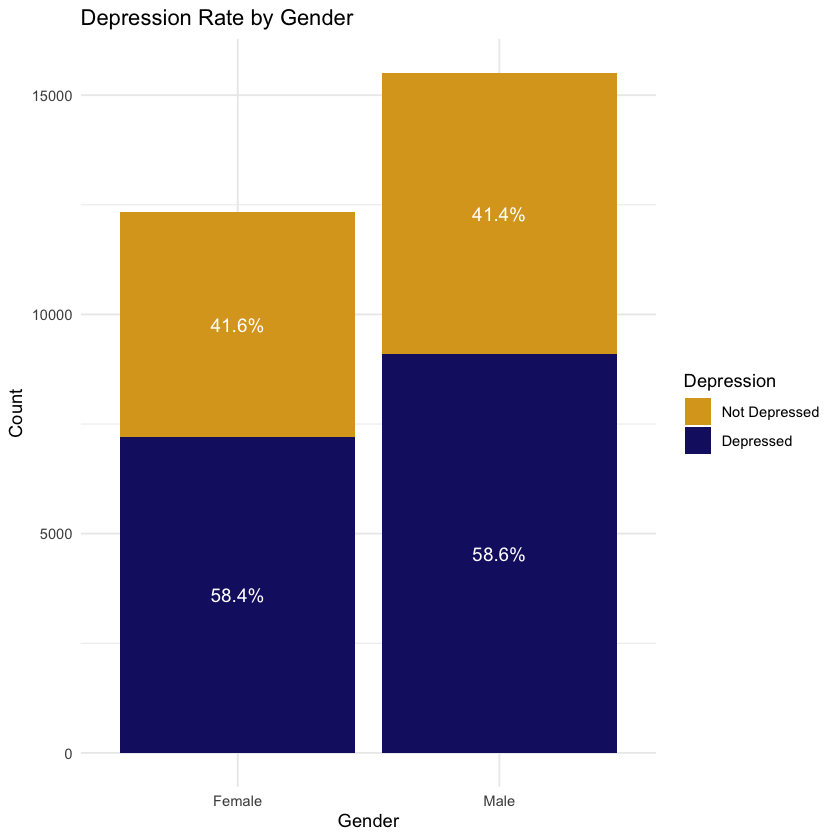

In [38]:
gender_plt <- df %>%
  group_by(gender, depression) %>%
  summarise(count = n(), .groups = "drop") %>%
  group_by(gender) %>%
  mutate(percentage = count / sum(count) * 100)
gender_plt$gender <- factor(gender_plt$gender,
                                  levels = c("Female", "Male"))

# Then plot
my_plot3 = ggplot(gender_plt,
       aes(x = gender, y = count, fill = factor(depression))) +
  geom_bar(stat = "identity", position = "stack") +
  geom_text(aes(label = paste0(round(percentage, 1), "%")),
            position = position_stack(vjust = 0.5), color = "white", size = 4) +
  scale_fill_manual(values = c("#DAA520", "#191970"),
                    name = "Depression",
                    labels = c("Not Depressed", "Depressed")) +
  labs(title = "Depression Rate by Gender",
       x = "Gender",
       y = "Count") +
  theme_minimal()
my_plot3

ggsave("figures/gender_depression.png", plot = my_plot3, width = 7, height = 5, units = "in", dpi = 300)

In [10]:
gender <- df %>%
    group_by(gender) %>%
    summarise(
        mean_depression = mean(depression, na.rm = TRUE),
        sd_depression = sd(depression, na.rm = TRUE),
        n = n())
gender

gender,mean_depression,sd_depression,n
<chr>,<dbl>,<dbl>,<int>
Female,0.5840500,0.4929050,12326
Male,0.5861002,0.4925468,15511


In [11]:
#Run a two-sample t-test for difference in means
t.test(depression ~ gender, data = df)


	Welch Two Sample t-test

data:  depression by gender
t = -0.34482, df = 26424, p-value = 0.7302
alternative hypothesis: true difference in means between group Female and group Male is not equal to 0
95 percent confidence interval:
 -0.01370412  0.00960370
sample estimates:
mean in group Female   mean in group Male 
           0.5840500            0.5861002 


In [12]:
#Two-sample z-test for proportions
df$suicidal_thoughts_num <- ifelse(df$suicidal_thoughts == "Yes", 1, 0)

gender_thoughts <- df %>%
    group_by(gender) %>%
    summarise(
        mean_thoughts = mean(suicidal_thoughts_num, na.rm = TRUE),
        sd_depression = sd(suicidal_thoughts_num, na.rm=TRUE),
        n = n())
gender_thoughts

#t-test for difference in means
t.test(suicidal_thoughts_num ~ gender, data = df)

gender,mean_thoughts,sd_depression,n
<chr>,<dbl>,<dbl>,<int>
Female,0.6333766,0.481902,12326
Male,0.6320031,0.482276,15511



	Welch Two Sample t-test

data:  suicidal_thoughts_num by gender
t = 0.23613, df = 26441, p-value = 0.8133
alternative hypothesis: true difference in means between group Female and group Male is not equal to 0
95 percent confidence interval:
 -0.01002784  0.01277486
sample estimates:
mean in group Female   mean in group Male 
           0.6333766            0.6320031 


In [13]:
prop.test(table(df$suicidal_thoughts_num, df$gender))


	2-sample test for equality of proportions with continuity correction

data:  table(df$suicidal_thoughts_num, df$gender)
X-squared = 0.049996, df = 1, p-value = 0.8231
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.01363786  0.01072167
sample estimates:
   prop 1    prop 2 
0.4418696 0.4433277 


## Research Question 3

### What is the True Population Mean of Study Hours Represented in the Population?

95% Confidence Interval: [ 7.115346 7.202433 ]


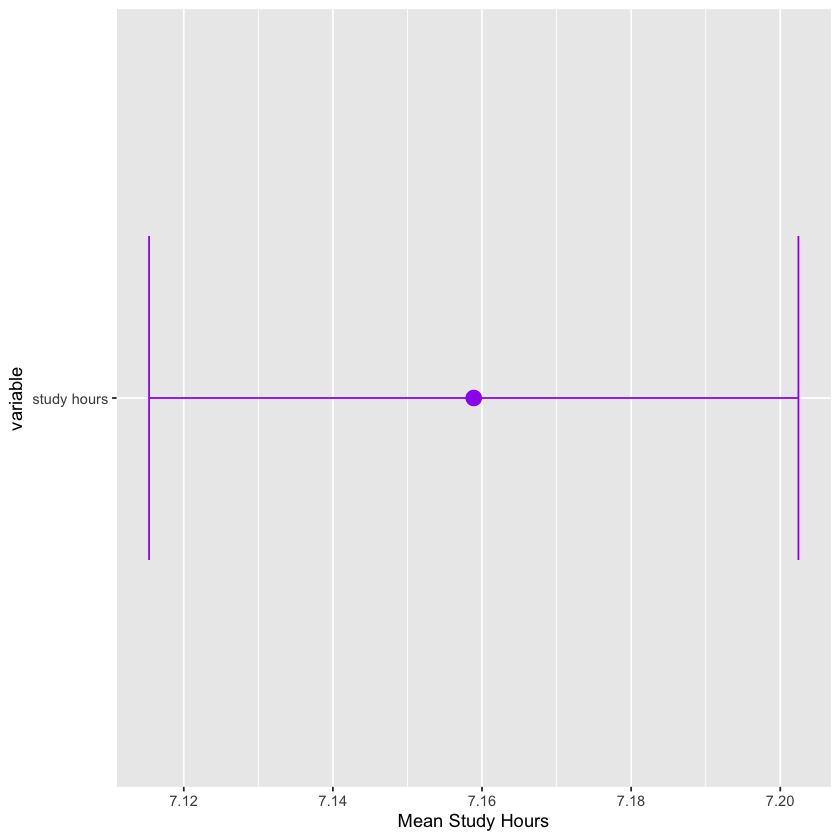

In [14]:
hours = df$study_hrs

mean_val = mean(hours, na.rm = TRUE)
sd_val = sd(hours, na.rm = TRUE)
n = sum(!is.na(hours))
z_crit = qnorm(0.975)
margin_of_error = z_crit * (sd_val / sqrt(n))
ci = c(mean_val - margin_of_error, mean_val + margin_of_error)

plot_df = data.frame(variable = "study hours", mean = mean_val, ci_lower = ci[1], ci_upper = ci[2])
ci_lower = ci[1]
ci_upper = ci[2]
ggplot(plot_df, aes(y=variable, x=mean)) + geom_point(size = 4, color = "purple") + geom_errorbar(aes(xmin=ci_lower, xmax=ci_upper), width =0.5, color = "purple") + labs(x= "Mean Study Hours") 
cat("95% Confidence Interval: [",ci,"]\n")